In [1]:
import numpy as np
import pandas as pd
import sys, os, h5py
sys.path.append(os.path.abspath('/home/icb/samuele.firmani/GhostFreePro/GCN_experiment'))
import utils
import train

/home/icb/samuele.firmani/miniconda3/envs/pytorch_geometric/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
proteome_multiscale_interactome = "/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_2022_12_7_17_22/transcriptome-proteome-effectometranscriptome-proteome-effectome_abs_feature_values_False_are_missing_values_imputed_True_mulstiscale_interactome_imputed.h5"


# Testing functions

In [3]:
data_torch_tensor = train.import_artivir_dataset(proteome_multiscale_interactome, omic_specific_type="all")

Use all omic layers
Features matrix shape torch.Size([13594, 26])
Number of node features 26


In [4]:
np.max(data_torch_tensor.edge_weights.tolist())

1.0

In [ ]:
np.sum(data_torch_tensor.train_mask.tolist())

In [ ]:
np.sum(data_torch_tensor.test_mask.tolist())

In [ ]:
np.sum(data_torch_tensor.val_mask.tolist())

In [ ]:
np.sum(data_torch_tensor.y[data_torch_tensor.train_mask].tolist())

In [ ]:
np.sum(data_torch_tensor.y[data_torch_tensor.test_mask].tolist())

In [ ]:
np.sum(data_torch_tensor.y[data_torch_tensor.val_mask].tolist())

- test cross validation splits k_fold(...) from utils

In [3]:
mask = data_torch_tensor.train_mask + data_torch_tensor.val_mask 
k_folds = utils.k_fold(mask, data_torch_tensor.y, 5)

NameError: name 'data_torch_tensor' is not defined

In [ ]:
for cv_index in np.arange(5):
    print(f"number of positives in {cv_index} k-fold split in training set {np.sum(data_torch_tensor.y[k_folds[cv_index][0]].tolist())} on a total of {np.sum(mask[k_folds[cv_index][0]].tolist())} labeled samples")
    print(f"number of positives in {cv_index} k-fold split in test set {np.sum(data_torch_tensor.y[k_folds[cv_index][1]].tolist())} on a total of {np.sum(mask[k_folds[cv_index][1]].tolist())} labeled samples")

### See how to add the viral interactome to the features matrix

In [7]:
import importlib
import feature_preselection_transcriptome_proteome

In [6]:
importlib.reload(feature_preselection_transcriptome_proteome)

<module 'feature_preselection_transcriptome_proteome' from '/home/icb/samuele.firmani/GhostFreePro/data_preprocessing_pipeline/feature_preselection_transcriptome_proteome.py'>

In [18]:
artivir_data_dir = "/lustre/groups/crna01/datasets/arti_vir/"
df_proteomics, df_transcriptomics, df_effectome, df_interactome, genes_for_input_dataset = feature_preselection_transcriptome_proteome.find_detected_genes("transcriptome-proteome-effectome-interactome", artivir_data_dir + "proteome_cell_lines.zip",artivir_data_dir + "transcriptome.zip", \
                                                        artivir_data_dir + "effectome.zip",artivir_data_dir + "viral_host_interactome.zip",True)

In [16]:
len(genes_for_input_dataset)

13576

### Read the virus host interactome file

In [75]:
df_interactome_original = pd.read_csv(artivir_data_dir + "viral_host_interactome.zip")
df_interactome_original = df_interactome_original[df_interactome_original["bait_organism"] == "SARS-CoV-2"]
df_interactome_original.head()

,bait_organism,bait_name,gene_name,protein_description,majority_protein_acs,fold_change_log2,p_value,fold change_threshold
8,SARS-CoV-2,E,ATP6V1B1...,"V-type proton ATPase subunit B, kidney isoform...",P15313;P21281,7.188133,1.807074e-04,2
9,SARS-CoV-2,E,CAAP1,Caspase activity and apoptosis inhibitor 1...,Q9H8G2;Q9H8G2-2,2.207975,1.595611e-13,2
10,SARS-CoV-2,E,CS,"Citrate synthase, mitochondrial",O75390,10.025748,7.507785e-49,2
11,SARS-CoV-2,E,MDH1,"Malate dehydrogenase, cytoplasmic...",P40925;P40925-2;P40925-3,7.884942,2.629954e-05,2
12,SARS-CoV-2,E,NOP53,Ribosome biogenesis protein NOP53,Q9NZM5,2.108266,5.522225e-23,2


In [ ]:
df_interactome.head()

,bait_organism,bait_name,gene_name,protein_description,majority_protein_acs,fold_change_log2,p_value,fold change_threshold
8,SARS-CoV-2,E,ATP6V1B1,"V-type proton ATPase subunit B, kidney isoform...",P15313;P21281,7.188133,1.807074e-04,2
9,SARS-CoV-2,E,CAAP1,Caspase activity and apoptosis inhibitor 1...,Q9H8G2;Q9H8G2-2,2.207975,1.595611e-13,2
10,SARS-CoV-2,E,CS,"Citrate synthase, mitochondrial",O75390,10.025748,7.507785e-49,2
11,SARS-CoV-2,E,MDH1,"Malate dehydrogenase, cytoplasmic...",P40925;P40925-2;P40925-3,7.884942,2.629954e-05,2
12,SARS-CoV-2,E,NOP53,Ribosome biogenesis protein NOP53,Q9NZM5,2.108266,5.522225e-23,2


In [19]:
np.max(df_interactome["p_value"].values)

0.0009981711396624

In [78]:
len(df_interactome["gene_name"].unique())

896

### Test the ppi network preparation

In [8]:
return_detected_genes = lambda: feature_preselection_transcriptome_proteome.find_detected_genes("transcriptome-proteome-effectome-interactome", artivir_data_dir + "proteome_cell_lines.zip",artivir_data_dir + "transcriptome.zip", \
                                                        artivir_data_dir + "effectome.zip",artivir_data_dir + "viral_host_interactome.zip",True)

In [21]:
#df_string_ppi = feature_preselection_transcriptome_proteome.multiomics_ppi_prep(return_detected_genes, "transcriptome-proteome-effectome", "STRING") 

In [147]:
#df_string_ppi.to_csv(artivir_data_dir + 'df_string_ppi_tmp.zip', index=False, compression = dict(method='zip',archive_name='df_string_ppi_tmp.csv'))
df_string_ppi = pd.read_csv(artivir_data_dir + 'df_string_ppi_tmp.zip')
df_multiscale = pd.read_csv(artivir_data_dir + "df_multiscale_interactome.zip")
len(df_multiscale)

387626

In [23]:
df_multiscale.head()

,node_1,node_2,node_1_type,node_2_type,gene_name_1,gene_name_2,experimental
0,6416,2318,protein,protein,MAP2K4,FLNC,1.0
1,6416,9043,protein,protein,MAP2K4,SPAG9,1.0
2,6416,5599,protein,protein,MAP2K4,MAPK8,1.0
3,6416,5871,protein,protein,MAP2K4,MAP4K2,1.0
4,6416,1326,protein,protein,MAP2K4,MAP3K8,1.0


In [24]:
df_multiscale = df_multiscale.dropna()

In [25]:
multiscale_gene_1 = df_multiscale["gene_name_1"].unique()
multiscale_gene_2 = df_multiscale["gene_name_2"].unique()

In [26]:
print(len(multiscale_gene_1))
print(len(multiscale_gene_2))

11971
17381


In [27]:
gene_name_1 = df_multiscale["gene_name_1"].values
gene_name_2 = df_multiscale["gene_name_2"].values

In [28]:
node_1 = df_multiscale["node_1"].values
node_2 = df_multiscale["node_2"].values

### Count the total number of connections in the multiscale interactome, considering that it is undirected

In [29]:
np.unique(gene_name_1)

array(['01-Sep', '02-Sep', '04-Sep', ..., 'ZYX', 'ZZEF1', 'ZZZ3'],
      dtype=object)

In [30]:
combinations = np.stack((node_1, node_2), axis=1) 

In [31]:
combinations

array([[  6416,   2318],
       [  6416,   9043],
       [  6416,   5599],
       ...,
       [643866,    869],
       [  1135,   1141],
       [  1369,   1370]])

In [32]:
ordered_combinations = np.array([np.unique(combinations[i]) for i in np.arange(len(combinations))])

In [33]:
len(ordered_combinations)

385692

In [34]:
unique_combinations = np.unique(ordered_combinations, axis=0)

In [35]:
print(f"Number of undirected edges: {len(unique_combinations)}")

Number of undirected edges: 385692


In [36]:
df_string_ppi.head()

,protein1,protein2,experimental,database,textmining,combined_score,gene_name_1,gene_name_2
0,9606.ENSP00000000233,9606.ENSP00000264718,157,0,0,156,ARF5,GPN1
1,9606.ENSP00000000233,9606.ENSP00000346046,178,0,0,177,ARF5,RPS17
2,9606.ENSP00000000233,9606.ENSP00000347134,143,0,63,162,ARF5,NET1
3,9606.ENSP00000000233,9606.ENSP00000354876,153,0,0,152,ARF5,MT-CO2
4,9606.ENSP00000000233,9606.ENSP00000381607,169,0,0,169,ARF5,GSTP1


In [37]:
string_gene_1 = df_string_ppi["gene_name_1"].unique()
string_gene_2 = df_string_ppi["gene_name_2"].unique()

In [38]:
print(len(string_gene_1))
print(len(string_gene_2))

11171
11171


In [ ]:
importlib.reload(feature_preselection_transcriptome_proteome)
time_stamp_list = [".SARS_CoV2@6h_vs_mock@6h", ".SARS_CoV2@12h_vs_mock@12h", ".SARS_CoV2@24h_vs_mock@24h"]

viral_proteins_names, import_artivir_dataset, genes_with_imputed_feature_values = feature_preselection_transcriptome_proteome.proteomics_trascriptomics_effectome_interactome_features_prep(time_stamp_list, 
                                                                                                                              time_stamp_list, False,
                                                                                                                              return_detected_genes=return_detected_genes,
                                                                                                                              df_ppi = df_multiscale)

Selecting connected genes among genes detected in the data: 100%|███████████████████████████████████████████████████████████████████████████████████████| 13576/13576 [00:04<00:00, 3271.99it/s]
Assigning features to connected genes:  74%|█████████████████████████████████████████████████████████████████████████████████▋                             | 8178/11114 [03:23<01:08, 42.78it/s]

In [51]:
len(feature_dict.keys())

11114

In [63]:
connected_genes = np.unique(np.concatenate((df_multiscale["gene_name_2"].values, df_multiscale["gene_name_1"].values), axis=0))

In [68]:
len(feature_dict.keys())

11114

In [65]:
imputed_genes_with_no_connection = []
for gene in genes_with_imputed_feature_values:
    if gene not in connected_genes:
        imputed_genes_with_no_connection.append(gene)

In [66]:
print(f"number of imputed genes that have no connection {len(imputed_genes_with_no_connection)}")

number of imputed genes that have no connection 0


In [69]:
genes_with_features_with_no_connection = []
for gene in feature_dict.keys():
    if gene not in connected_genes:
        genes_with_features_with_no_connection.append(gene)

In [70]:
print(f"total number of genes that have no connection {len(genes_with_features_with_no_connection)}")

total number of genes that have no connection 0


In [74]:
df_interactome

,bait_organism,bait_name,gene_name,protein_description,majority_protein_acs,fold_change_log2,p_value,fold change_threshold
8,SARS-CoV-2,E,ATP6V1B1,"V-type proton ATPase subunit B, kidney isoform...",P15313;P21281,7.188133,1.807074e-04,2
9,SARS-CoV-2,E,CAAP1,Caspase activity and apoptosis inhibitor 1...,Q9H8G2;Q9H8G2-2,2.207975,1.595611e-13,2
10,SARS-CoV-2,E,CS,"Citrate synthase, mitochondrial",O75390,10.025748,7.507785e-49,2
11,SARS-CoV-2,E,MDH1,"Malate dehydrogenase, cytoplasmic...",P40925;P40925-2;P40925-3,7.884942,2.629954e-05,2
12,SARS-CoV-2,E,NOP53,Ribosome biogenesis protein NOP53,Q9NZM5,2.108266,5.522225e-23,2
...,...,...,...,...,...,...,...,...
1790,SARS-CoV-2,ORF9b,SARS_CoV2_ORF9b,Accessory protein 9b,P0DTD2,18.850882,0.000000e+00,2
1791,SARS-CoV-2,ORF9b,TOMM70,Mitochondrial import receptor subunit TOM70,O94826,15.669644,3.263133e-05,2
1794,SARS-CoV-2,S,GOLGA7,Golgin subfamily A member 7...,Q7Z5G4;Q7Z5G4-3,7.566474,1.689030e-04,2
1795,SARS-CoV-2,S,SARS_CoV2_S,Spike glycoprotein,P0DTC2,17.171125,0.000000e+00,2


In [81]:
p_values = df_interactome[df_interactome["gene_name"] == "CAV2"][df_interactome[df_interactome["gene_name"] == "CAV2"]['bait_name'] == 'M']["p_value"].values
l2fc_values = df_interactome[df_interactome["gene_name"] == "CAV2"][df_interactome[df_interactome["gene_name"] == "CAV2"]['bait_name'] == 'M']["fold_change_log2"].values

In [82]:
[feature_preselection_transcriptome_proteome.feature_fold_change_pvalue_combination(l2fc, pval, False) for l2fc, pval in zip(l2fc_values,p_values)]

[10.205852831765041, 8.931359386175576]

In [9]:
import preprocessing_utils

In [105]:
importlib.reload(preprocessing_utils)
network, features, node_names, feat_names, container_data_path = preprocessing_utils.create_adjacency_matrix_and_feature_matrix(df_multiscale, feature_dict, viral_proteins_names, "transcriptome-proteome-effectome-interactome", is_debug = False)

Create randomized gene list
Create adjacency matrix  


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11114/11114 [07:18<00:00, 25.37it/s]


Feature matrix creation


In [113]:
np.sum(network[0])

12.0

In [140]:
degrees = []
for array in network:
    degrees.append(np.sum(array != 0))

In [145]:
degrees = sorted(degrees, reverse=True)

In [146]:
x = np.arange(len(degrees))

In [5]:
import matplotlib.pyplot as plt

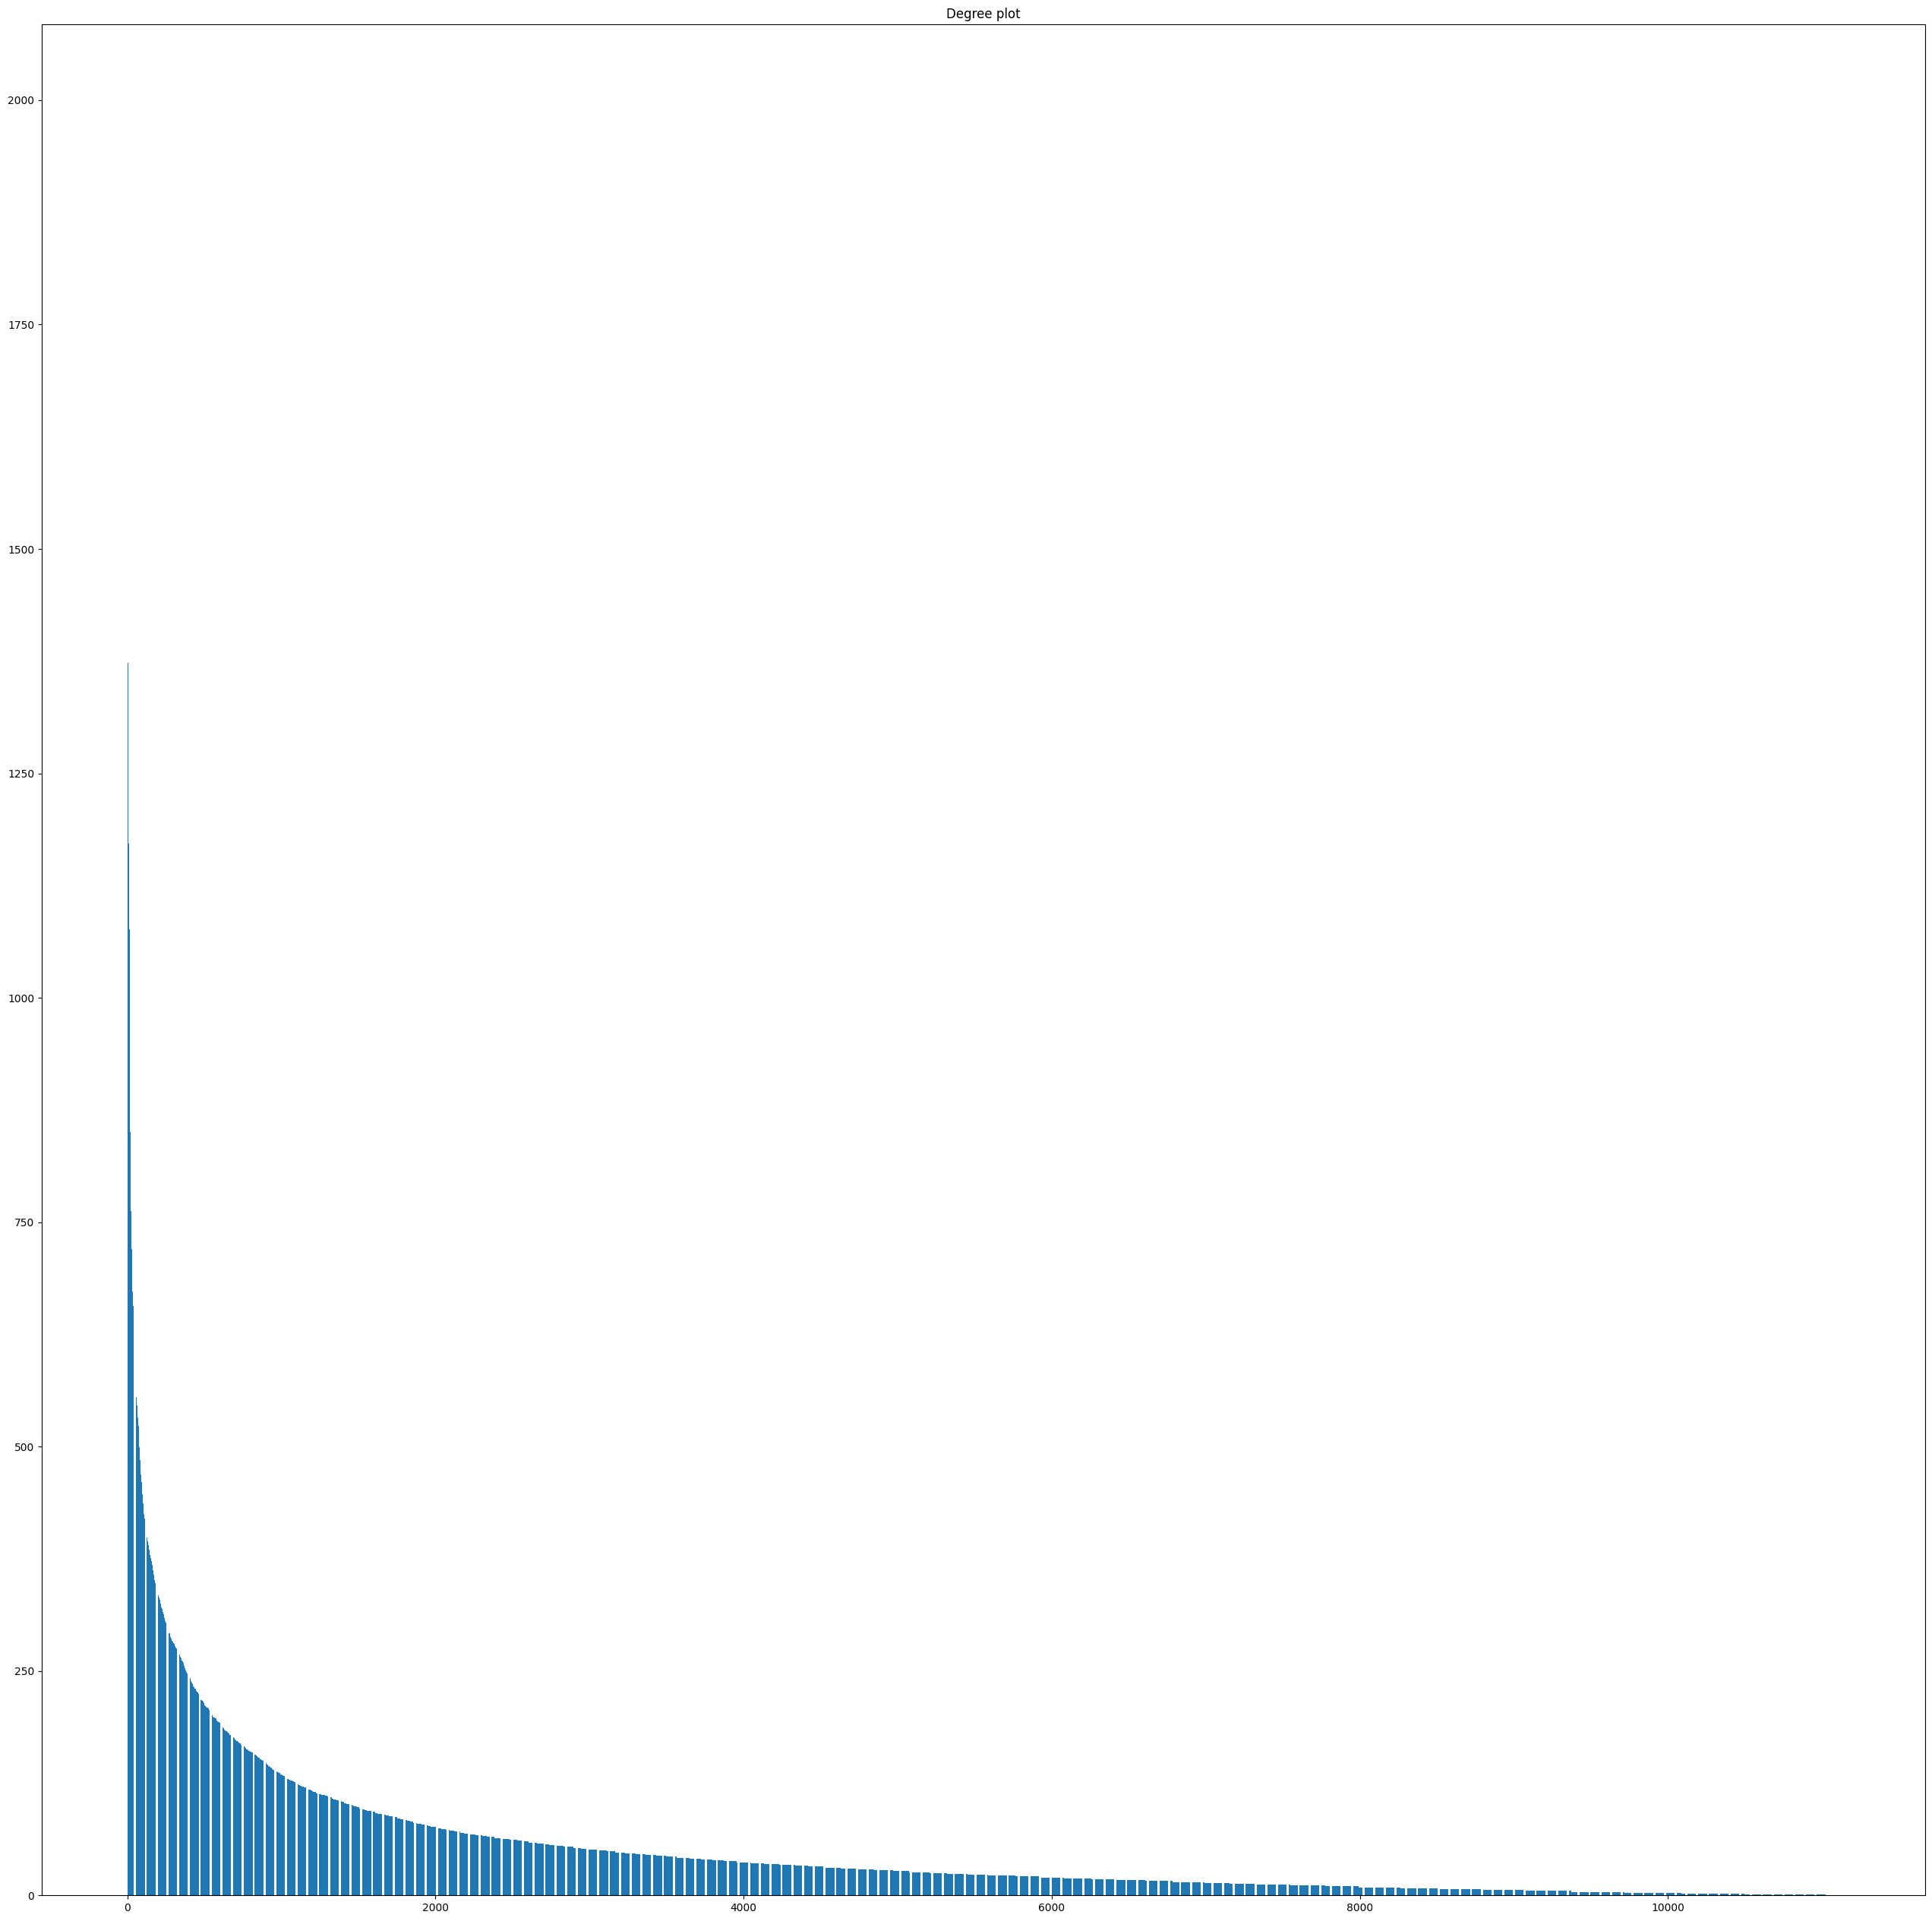

In [152]:
plt.figure(figsize=(32,32))
plt.bar(x, degrees)
plt.title("Degree plot")
plt.show()

In [106]:
container_data_path

PosixPath('/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_effectome_2023_1_31_17_27')

In [149]:
np.sum(network != 0)

577258

In [150]:
len(features[0])

50

In [151]:
len(feature_dict['A2M'])

54

In [49]:
features[0][-24:-1]

array([-7.15243573e-05, -1.84378434e-04, -1.36141334e-04, -3.92388224e-04,
       -8.51573889e-05, -4.98548297e-06,  3.31816584e-04, -9.40856737e-05,
        2.17032979e-04,  1.35316579e-04, -1.31152322e-04, -2.56015135e-04,
        9.51523992e-05, -7.19261779e-04, -2.02022739e-04, -3.75215248e-04,
        2.35545363e-05,  4.64950876e-05,  3.00862186e-04,  4.23025182e-05,
        1.56647123e-04, -2.10733352e-05,  3.72450842e-04])

### Model Testing, dropout edges

In [10]:
import importlib
import preprocessing_utils
import feature_preselection_transcriptome_proteome

In [11]:
importlib.reload(preprocessing_utils)
importlib.reload(feature_preselection_transcriptome_proteome)

<module 'feature_preselection_transcriptome_proteome' from '/home/icb/samuele.firmani/GhostFreePro/data_preprocessing_pipeline/feature_preselection_transcriptome_proteome.py'>

In [12]:
import models, dropout

In [8]:
importlib.reload(utils)
#importlib.reload(train)
importlib.reload(models)
importlib.reload(dropout)

<module 'dropout' from '/home/icb/samuele.firmani/GhostFreePro/GCN_experiment/dropout.py'>

In [20]:
data_multiscale = train.import_artivir_dataset("/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_1_31_18_42/transcriptome-proteome-effectome-interactometranscriptome-proteome-effectome-interactome_abs_feature_values_False_are_missing_values_imputed_True_mulstiscale_interactome_imputed.h5", "all")

Use all omic layers
Features matrix shape torch.Size([11040, 50])


In [14]:
data_string = train.import_artivir_dataset("/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_2_2_12_11/transcriptome-proteome-effectome-interactometranscriptome-proteome-effectome-interactome_abs_feature_values_False_are_missing_values_imputed_True_STRING_imputed.h5", "all")

Use all omic layers
Features matrix shape torch.Size([11171, 50])


In [8]:
from utils import load_hdf_data

In [50]:
raw_data_multiscale = utils.load_hdf_data("/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_1_31_18_42/transcriptome-proteome-effectome-interactometranscriptome-proteome-effectome-interactome_abs_feature_values_False_are_missing_values_imputed_True_mulstiscale_interactome_imputed.h5")

In [51]:
network, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, node_names, feat_names = raw_data_multiscale

In [58]:
features

array([[-8.97606671e-02, -8.73884696e-02, -1.79252844e+00, ...,
         5.10049390e-04, -2.32858794e-04,  1.36309196e-04],
       [-2.82915995e-01,  1.53622768e-01, -2.16121287e-02, ...,
         1.15759660e-04,  4.76922561e-05,  7.28549164e-05],
       [ 2.07692345e-01,  1.89997609e-01, -8.64068467e-01, ...,
        -5.75945819e-05, -2.91736629e-04, -4.44878208e-05],
       ...,
       [-9.49600206e-02,  2.97172727e-01,  9.13779415e-01, ...,
        -2.94870787e-05,  2.84273788e-04,  1.36699519e-04],
       [ 1.79110564e-01,  1.09114553e-01,  7.87520876e-02, ...,
        -1.44567445e-04,  2.53916817e-04,  2.48468172e-04],
       [ 3.59665592e-01,  1.22461115e-01,  4.51229279e-01, ...,
         2.78523188e-04, -4.33414094e-05,  4.28888790e-05]])

In [53]:
np.shape(features[:,0:1])

(11040, 1)

In [57]:
np.random.shuffle(features)

In [45]:
type(features[:,0:1])

numpy.ndarray

In [42]:
np.shape(features[:,1:2])

(11040, 1)

In [37]:
np.shape(features[:,2:26])

(11040, 24)

In [39]:
np.shape(features[:,26:50])

(11040, 24)

In [13]:
data_string

Data(edge_index=[2, 1076998], edge_weights=[1076998], x=[11171, 50], y=[11171], train_mask=[11171], test_mask=[11171], val_mask=[11171], num_node_features=50)

In [14]:
data_multiscale

Data(edge_index=[2, 577258], edge_weights=[577258], x=[11040, 50], y=[11040], train_mask=[11040], test_mask=[11040], val_mask=[11040], num_node_features=50)

In [14]:
data_multiscale.x.size()

torch.Size([11040, 50])

In [13]:
data_string.x.size()

torch.Size([11171, 50])

In [18]:
data_string.x

tensor([[-6.5824e-02,  5.6316e-02, -9.8554e-02,  ..., -1.9263e-04,
         -1.5616e-04, -6.9960e-04],
        [ 5.8445e-02, -6.5545e-01,  5.5571e-01,  ..., -1.9164e-04,
          5.0174e-04, -1.0325e-04],
        [-4.1737e-01, -5.8481e-02, -1.6943e-01,  ...,  4.2142e-04,
         -6.9509e-04,  1.6275e-04],
        ...,
        [ 2.2245e-01, -1.1073e-01,  2.7193e-01,  ..., -2.7900e-04,
         -7.5796e-05,  1.7955e-04],
        [-5.3680e-02,  2.9871e-01,  3.1936e-02,  ...,  8.3029e+00,
         -5.6659e-04,  8.4219e-05],
        [-1.1760e+00,  1.2655e-02, -1.7465e-01,  ..., -2.3180e-04,
         -1.3039e-04, -2.9266e-04]])

In [ ]:
# transcriptome
data_string.x[:, 0:1]

In [20]:
# proteome
data_string.x[:, 1:2]

tensor([[ 0.0563],
        [-0.6554],
        [-0.0585],
        ...,
        [-0.1107],
        [ 0.2987],
        [ 0.0127]])

In [ ]:
data_string.x[:, 1:2]

In [ ]:
dropout.dropout_edge(data.edge_index)

In [ ]:
import torch
edge_index = torch.tensor([[0, 1, 1, 2, 2, 3],
                           [1, 0, 2, 1, 3, 2]])

In [22]:
edge_index.t()

tensor([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1],
        [2, 3],
        [3, 2]])

In [26]:
edge_index.t()[:,1]

tensor([1, 0, 2, 1, 3, 2])

In [29]:
torch.where(edge_index.t()[:,1] > 1, 1, 0)

tensor([0, 0, 1, 0, 1, 1])

In [13]:
edge_index.argmax(dim=1)

tensor([5, 4])

In [28]:
edge_index, edge_mask = dropout.dropout_edge(edge_index, p=0.25)

In [29]:
edge_index

tensor([[0, 1, 2, 2],
        [1, 0, 1, 3]])

In [30]:
edge_mask

tensor([ True,  True, False,  True,  True, False])

In [33]:
edge_index, edge_id = dropout.dropout_edge(edge_index,
                                    force_undirected=True)

In [34]:
edge_index

tensor([[1, 2, 2, 3],
        [2, 3, 1, 2]])

In [35]:
edge_id

tensor([2, 4, 2, 4])

In [37]:
data.edge_weights

tensor([1., 1., 1.,  ..., 1., 1., 1.])

### Test edge dropout on real data

In [21]:
# multiscale gene list
container_data_path = "/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_1_31_18_42/"
randomized_gene_list = np.genfromtxt( container_data_path + "randomized_gene_list.txt", dtype=str)

In [22]:
len(randomized_gene_list)

11040

In [23]:
positive_host_factors = np.load(artivir_data_dir + "strong_functionally_validated_host_factors.npy")
len(positive_host_factors)

198

In [24]:
data_multiscale

array(['AAGAB', 'ACE2', 'ACTR2', 'ACTR3', 'ADAM9', 'ADAR', 'ALG11',
       'AP1B1', 'AP1G1', 'APOL1', 'ARF5', 'ARF6', 'ARID1A', 'ARPC3',
       'ARPC4', 'ATP6AP1', 'ATP6V1A', 'ATP8B1', 'ATP8B1 ', 'ATXN2L',
       'AXL', 'BAX', 'BCS1L', 'BECN1', 'BMPR1A', 'BRD2', 'BRD4', 'BSG',
       'BZW2', 'C16orf62', 'C18orf8', 'CCDC22', 'CCDC53', 'CCDC93',
       'CCT2', 'CCZ1', 'CCZ1B', 'CDKN2B', 'CHUK', 'CLEC4G', 'CLIP4',
       'CNOT4', 'CNTRL', 'COMMD10', 'COMMD2', 'COMMD3', 'COMMD3-BMI1',
       'COMMD4', 'COMMD5', 'COMMD7', 'COMMD8', 'CSDE1', 'CTSL', 'CXCL5',
       'DCAKD', 'DDX1', 'DDX42', 'DDX5', 'DNMT1', 'DPF2', 'DPH5',
       'DYRK1A', 'ECSIT', 'EDC4', 'EEF1A1', 'EIF3D', 'ELOB', 'EMC1',
       'EP300', 'ERGIC1', 'ERP44', 'ETFA', 'EWSR1', 'EXOC2', 'EXOC6',
       'EXOC8', 'EXT1', 'FAM120A', 'FASTKD5', 'FBXO27', 'FBXO33', 'FKBP8',
       'GNB1', 'GOLGA2', 'HDAC9', 'HMGB1', 'HMOX1', 'HNRNPA2B1', 'HNRNPC',
       'HNRNPH1', 'HNRNPK', 'HNRNPU', 'HNRNPUL2', 'HSPA4', 'IGF2BP1',
       'IL17RA',

In [26]:
len(randomized_gene_list)

11040

In [58]:
proteomics_tensor = data_multiscale.x[:, 1].numpy()

In [36]:
mask = data_multiscale.train_mask + data_multiscale.val_mask + data_multiscale.test_mask

In [41]:
data_multiscale.y.sum()

tensor(182)

In [45]:
positive_set = randomized_gene_list[np.where(data_multiscale.y.numpy() == 1)]

In [53]:
negatives = (mask.numpy() - data_multiscale.y.numpy())

In [54]:
negatives_set = randomized_gene_list[np.where(negatives == 1)]

In [61]:
proteomics_positives = proteomics_tensor[np.where(data_multiscale.y.numpy() == 1)]

In [62]:
proteomics_negatives = proteomics_tensor[np.where(negatives == 1)]

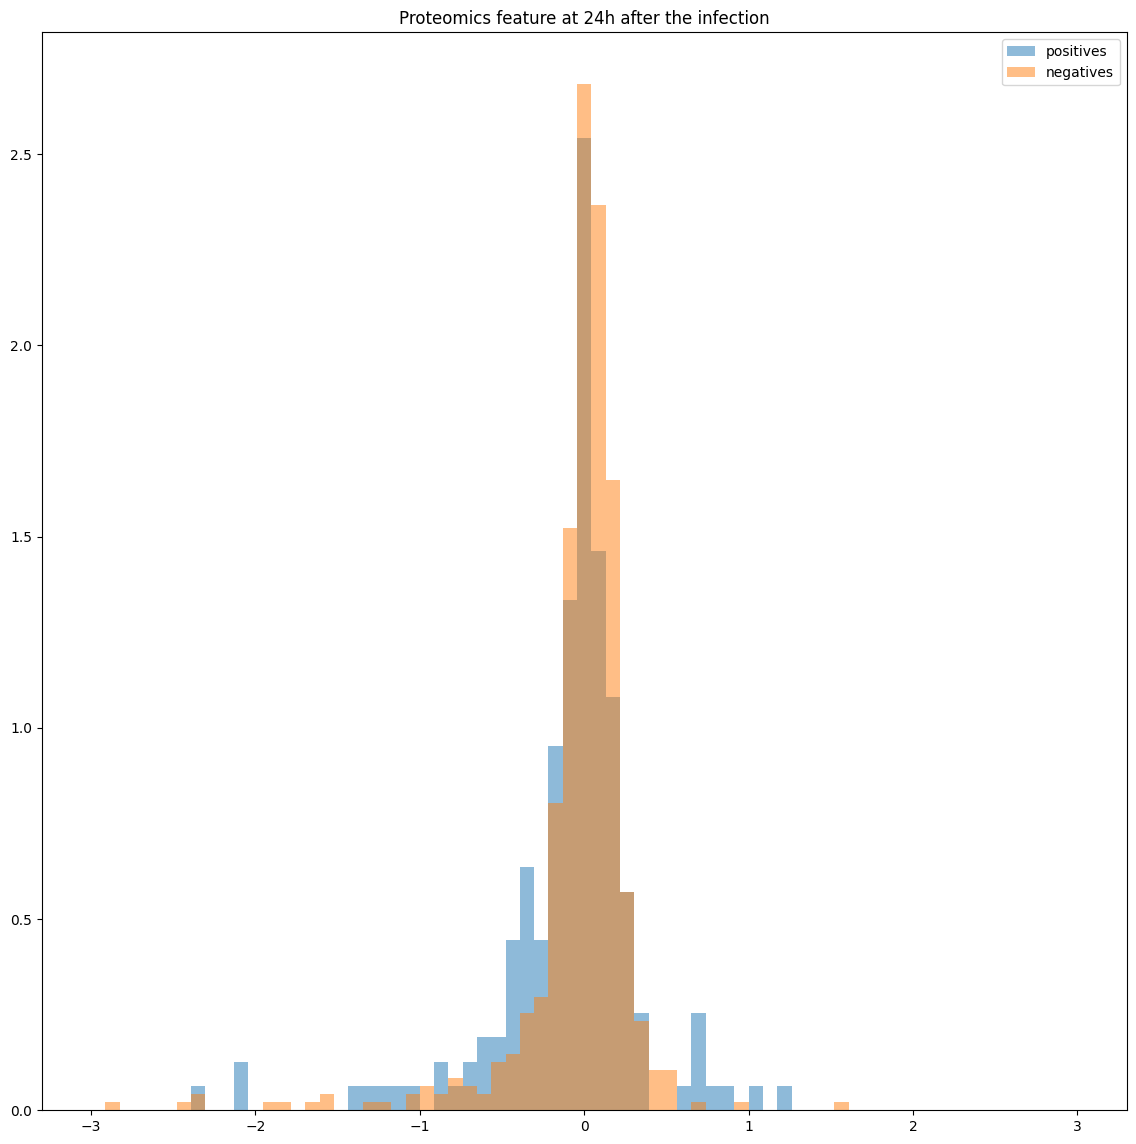

In [74]:
bins = np.linspace(-3, 3, 70)

plt.figure(figsize=(14, 14))
plt.hist(proteomics_positives, bins, alpha=0.5, label='positives', density = True)
plt.hist(proteomics_negatives, bins, alpha=0.5, label='negatives', density = True)
plt.legend(loc='upper right')
plt.title("Proteomics feature at 24h after the infection")
plt.show()

In [22]:
# check if the host factors are correctly selected
indices_of_positives = []
for item in positive_host_factors:
    if len(np.where(randomized_gene_list == item)[0]) > 0:
        indices_of_positives.append(np.where(randomized_gene_list == item)[0][0])
indices_of_positives = np.array(indices_of_positives)       

In [34]:
sum(data_multiscale.y)

tensor(182)

In [24]:
len(indices_of_positives)

182

In [35]:
positives_recorded_in_data = randomized_gene_list[data_multiscale.y.bool().numpy()]

In [36]:
for gene in positives_recorded_in_data:
    if gene not in positive_host_factors:
        print(gene)

In [37]:
edge_index, edge_mask = dropout.dropout_edge(data_multiscale.edge_index, p=0.25)

In [38]:
edge_index

tensor([[    0,     0,     0,  ..., 11039, 11039, 11039],
        [  562,   880,  1455,  ..., 10986, 10997, 11026]])

In [39]:
edge_mask

tensor([True, True, True,  ..., True, True, True])

In [40]:
data_multiscale.edge_weights.size()

torch.Size([577258])

In [41]:
edge_index.size()

torch.Size([2, 433048])

In [42]:
edge_mask.size()

torch.Size([577258])

In [43]:
len(data_multiscale.edge_weights[edge_mask])

433048

### Let's see how the positives are positional encoded with respect to the negatives in the Multiscale PPI

In [ ]:
total_mask = data_multiscale.train_mask.numpy() + data_multiscale.test_mask.numpy() + data_multiscale.val_mask.numpy() 

In [45]:
np.sum(total_mask)

728

In [46]:
negative_mask = total_mask - data_multiscale.y.numpy()
np.sum(negative_mask)

546

In [47]:
positive_mask = data_multiscale.y.numpy()

In [48]:
nor_positive_nor_negative_mask = np.ones(len(positive_mask)) - positive_mask - negative_mask

In [49]:
data.x.size()

torch.Size([11040, 50])

In [13]:
import os.path as osp
import sys

import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE

from torch_geometric.nn import Node2Vec

In [14]:
import networkx as nx
from torch_geometric.utils import to_networkx

In [53]:
nx_network = to_networkx(data_multiscale, to_undirected=True)

In [54]:
nx.number_connected_components(nx_network)

2

In [55]:
[c for c in sorted(nx.connected_components(nx_network), key=len, reverse=True)][1:]

[{5657, 5968}]

In [56]:
disconnected_ids = [5657, 5968]
for disconnected_id in disconnected_ids:
    nx_network.remove_node(disconnected_id)

In [100]:
#nx.diameter(nx_network)

7

In [57]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data_multiscale.edge_index, embedding_dim=16, walk_length=6, context_size=4, walks_per_node=10, num_negative_samples=1, p=1, q=1, sparse=True).to(device)

num_workers = 0 if sys.platform.startswith('win') else 4
loader = model.loader(batch_size=128, shuffle=True, num_workers=num_workers)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(1, 100):
    loss = train()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

Epoch: 01, Loss: 2.9613
Epoch: 02, Loss: 2.2243
Epoch: 03, Loss: 1.8229
Epoch: 04, Loss: 1.6001
Epoch: 05, Loss: 1.4404
Epoch: 06, Loss: 1.3323
Epoch: 07, Loss: 1.2745
Epoch: 08, Loss: 1.2428
Epoch: 09, Loss: 1.2222
Epoch: 10, Loss: 1.2081
Epoch: 11, Loss: 1.1969
Epoch: 12, Loss: 1.1875
Epoch: 13, Loss: 1.1769
Epoch: 14, Loss: 1.1685
Epoch: 15, Loss: 1.1622
Epoch: 16, Loss: 1.1553
Epoch: 17, Loss: 1.1501
Epoch: 18, Loss: 1.1454
Epoch: 19, Loss: 1.1411
Epoch: 20, Loss: 1.1384
Epoch: 21, Loss: 1.1344
Epoch: 22, Loss: 1.1326
Epoch: 23, Loss: 1.1301
Epoch: 24, Loss: 1.1271
Epoch: 25, Loss: 1.1255
Epoch: 26, Loss: 1.1241
Epoch: 27, Loss: 1.1220
Epoch: 28, Loss: 1.1213
Epoch: 29, Loss: 1.1202
Epoch: 30, Loss: 1.1193
Epoch: 31, Loss: 1.1182
Epoch: 32, Loss: 1.1171
Epoch: 33, Loss: 1.1165
Epoch: 34, Loss: 1.1170
Epoch: 35, Loss: 1.1157
Epoch: 36, Loss: 1.1140
Epoch: 37, Loss: 1.1144
Epoch: 38, Loss: 1.1128
Epoch: 39, Loss: 1.1127
Epoch: 40, Loss: 1.1129
Epoch: 41, Loss: 1.1110
Epoch: 42, Loss:

In [58]:
model.eval()

Node2Vec(11040, 16)

In [59]:
z = TSNE(n_components=2).fit_transform(model(torch.arange(data_multiscale.num_nodes, device=device)).detach().cpu().numpy())

/home/icb/samuele.firmani/miniconda3/envs/pytorch_geometric/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/icb/samuele.firmani/miniconda3/envs/pytorch_geometric/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [60]:
np.shape(z)

(11040, 2)

In [32]:
import numpy.ma as ma

In [61]:
negative_mask_reduced = np.array([element if index < len(negative_mask)/3 else 0 for index, element in enumerate(negative_mask)] )

In [62]:
np.sum(negative_mask_reduced)

206

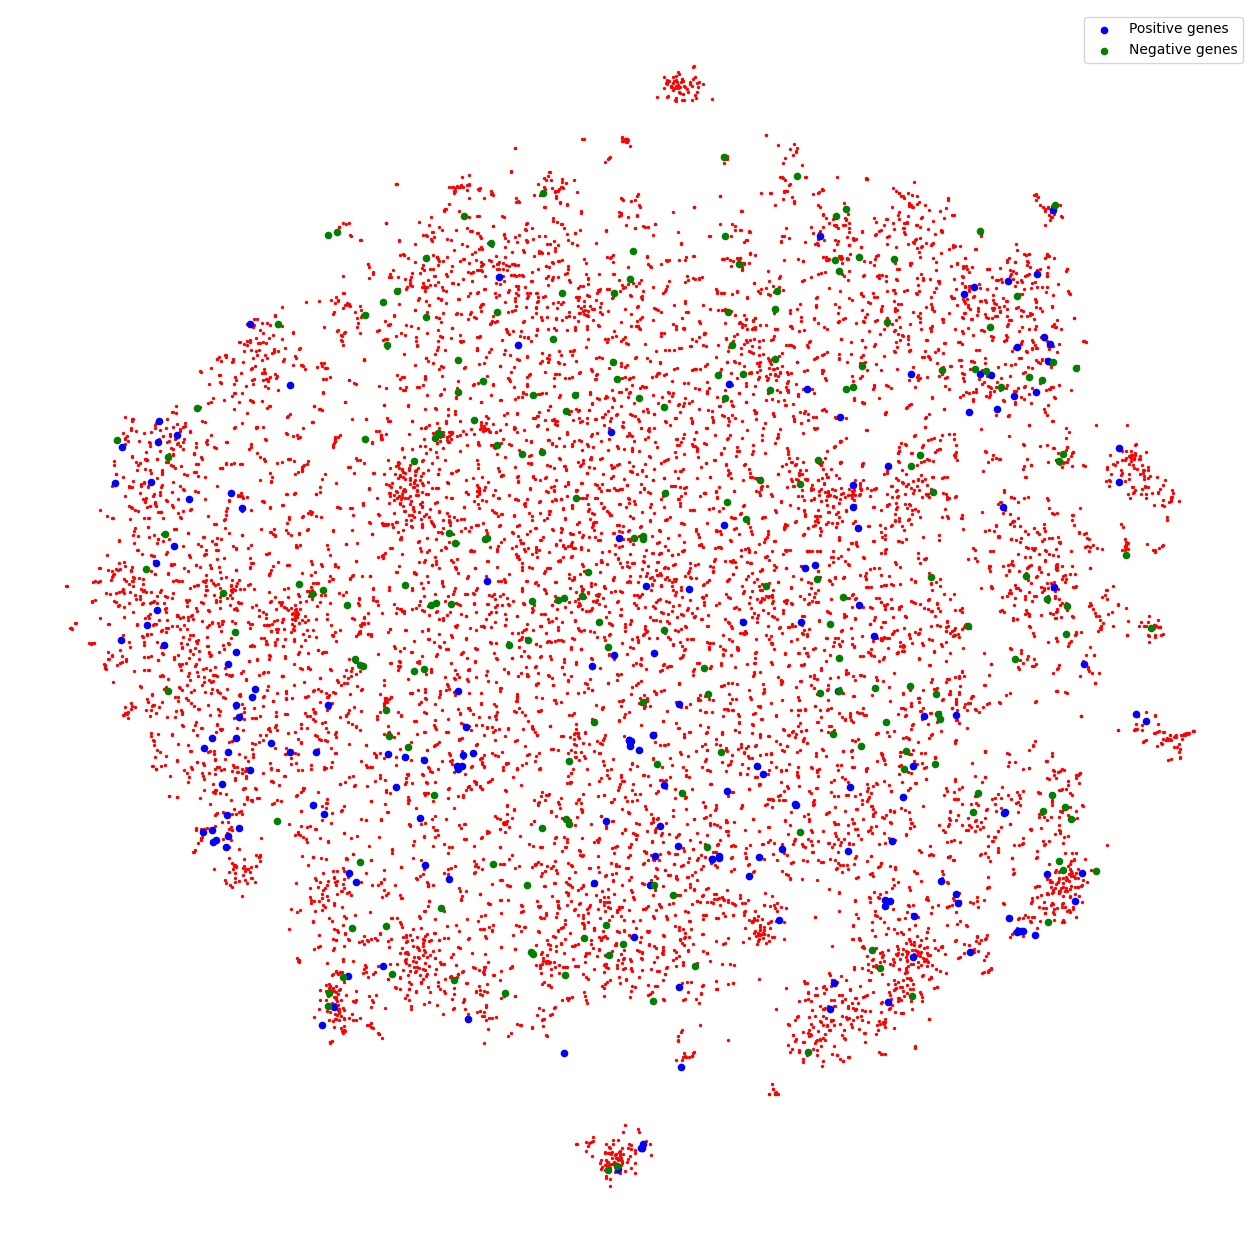

In [64]:
colors = ['b', 'r', 'g']

plt.figure(figsize=(16, 16))
plt.scatter(z[nor_positive_nor_negative_mask.astype(bool), 0], z[nor_positive_nor_negative_mask.astype(bool), 1], s=2, color=colors[1])
plt.scatter(z[positive_mask.astype(bool), 0], z[positive_mask.astype(bool), 1], s=20, color=colors[0], label="Positive genes")
plt.scatter(z[negative_mask_reduced.astype(bool), 0], z[negative_mask_reduced.astype(bool), 1], s=20, color=colors[2], label="Negative genes")
plt.legend(scatterpoints=1)
plt.axis('off')
plt.show()

### Let's see how the positives are positional encoded with respect to the negatives in the reduced STRING PPI

In [18]:
data_string

Data(edge_index=[2, 1076998], edge_weights=[1076998], x=[11171, 50], y=[11171], train_mask=[11171], test_mask=[11171], val_mask=[11171], num_node_features=50)

In [19]:
(data_string.edge_weights > 0.3).sum()

tensor(217242)

In [20]:
edges_to_consider = data_string.edge_weights > 0.3

In [97]:
data_string.edge_index.size()

torch.Size([2, 1076998])

In [100]:
data_string_edges_reduced = data_string.edge_index[:,edges_to_consider]

In [101]:
data_string_edges_reduced.size()

torch.Size([2, 217242])

In [19]:
total_mask = data_string.train_mask.numpy() + data_string.test_mask.numpy() + data_string.val_mask.numpy() 

negative_mask = total_mask - data_string.y.numpy()

positive_mask = data_string.y.numpy()

nor_positive_nor_negative_mask = np.ones(len(positive_mask)) - positive_mask - negative_mask

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data_string.edge_index, embedding_dim=16, walk_length=6, context_size=4, walks_per_node=10, num_negative_samples=1, p=1, q=1, sparse=True).to(device)

num_workers = 0 if sys.platform.startswith('win') else 4
loader = model.loader(batch_size=128, shuffle=True, num_workers=num_workers)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(1, 100):
    loss = train()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

Epoch: 01, Loss: 2.9945
Epoch: 02, Loss: 2.2466
Epoch: 03, Loss: 1.8413
Epoch: 04, Loss: 1.6241
Epoch: 05, Loss: 1.4824
Epoch: 06, Loss: 1.3694
Epoch: 07, Loss: 1.2980
Epoch: 08, Loss: 1.2584
Epoch: 09, Loss: 1.2360
Epoch: 10, Loss: 1.2165
Epoch: 11, Loss: 1.2017
Epoch: 12, Loss: 1.1904
Epoch: 13, Loss: 1.1786
Epoch: 14, Loss: 1.1695
Epoch: 15, Loss: 1.1640
Epoch: 16, Loss: 1.1575
Epoch: 17, Loss: 1.1529
Epoch: 18, Loss: 1.1489
Epoch: 19, Loss: 1.1462
Epoch: 20, Loss: 1.1422
Epoch: 21, Loss: 1.1396
Epoch: 22, Loss: 1.1367
Epoch: 23, Loss: 1.1349
Epoch: 24, Loss: 1.1329
Epoch: 25, Loss: 1.1315
Epoch: 26, Loss: 1.1305
Epoch: 27, Loss: 1.1291
Epoch: 28, Loss: 1.1273
Epoch: 29, Loss: 1.1251
Epoch: 30, Loss: 1.1243
Epoch: 31, Loss: 1.1238
Epoch: 32, Loss: 1.1222
Epoch: 33, Loss: 1.1218
Epoch: 34, Loss: 1.1226
Epoch: 35, Loss: 1.1207
Epoch: 36, Loss: 1.1199
Epoch: 37, Loss: 1.1200
Epoch: 38, Loss: 1.1196
Epoch: 39, Loss: 1.1197
Epoch: 40, Loss: 1.1203
Epoch: 41, Loss: 1.1183
Epoch: 42, Loss:

In [20]:
model.eval()

Node2Vec(11171, 16)

In [21]:
z = TSNE(n_components=2).fit_transform(model(torch.arange(data_string.num_nodes, device=device)).detach().cpu().numpy())

/home/icb/samuele.firmani/miniconda3/envs/pytorch_geometric/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/icb/samuele.firmani/miniconda3/envs/pytorch_geometric/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [22]:
negative_mask_reduced = np.array([element if index < len(negative_mask)/3 else 0 for index, element in enumerate(negative_mask)] )

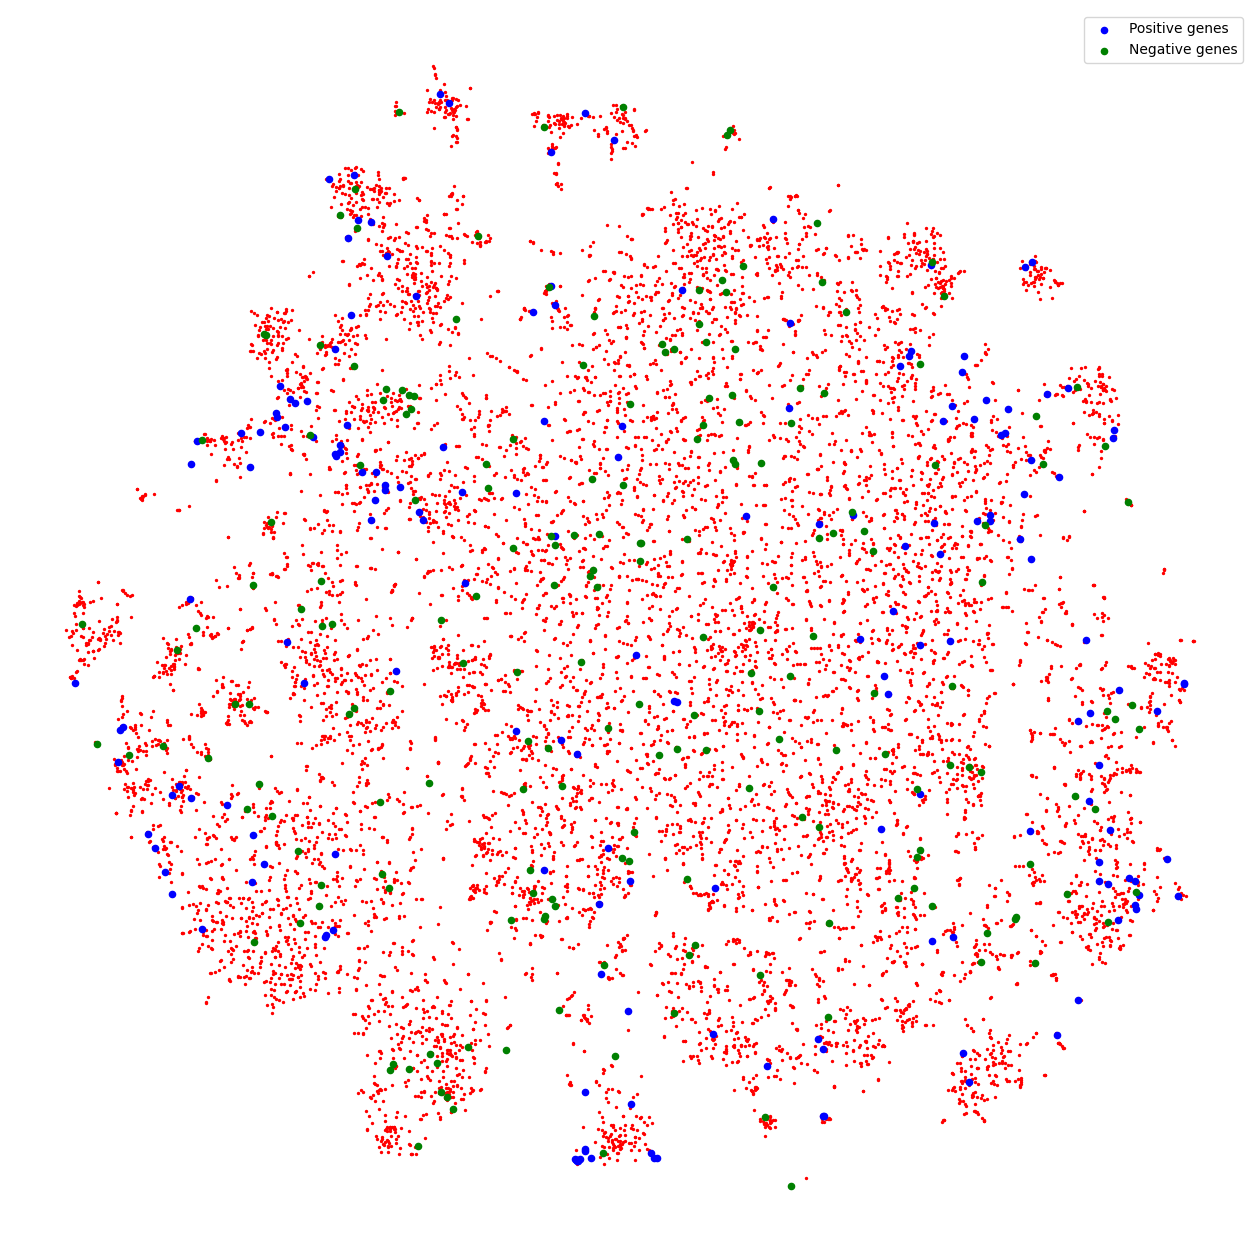

In [23]:
colors = ['b', 'r', 'g']


plt.figure(figsize=(16, 16))
plt.scatter(z[nor_positive_nor_negative_mask.astype(bool), 0], z[nor_positive_nor_negative_mask.astype(bool), 1], s=2, color=colors[1])
plt.scatter(z[positive_mask.astype(bool), 0], z[positive_mask.astype(bool), 1], s=20, color=colors[0], label="Positive genes")
plt.scatter(z[negative_mask_reduced.astype(bool), 0], z[negative_mask_reduced.astype(bool), 1], s=20, color=colors[2], label="Negative genes")
plt.legend(scatterpoints=1)
plt.axis('off')
plt.show()

### How to easily filter data starting from a Data object

In [40]:
data_string

Data(edge_index=[2, 1076998], edge_weights=[1076998], x=[11171, 50], y=[11171], train_mask=[11171], test_mask=[11171], val_mask=[11171], num_node_features=50)

In [43]:
df_proteomics.head()

,protein_id,gene_name,majority_protein_acs,protein_descriptions,is_viral,is_hit.SARS_CoV2@6h_vs_mock@6h,change.SARS_CoV2@6h_vs_mock@6h,fold_change_log2.SARS_CoV2@6h_vs_mock@6h,p_value.SARS_CoV2@6h_vs_mock@6h,sd_log2.SARS_CoV2@6h_vs_mock@6h,...,is_hit.SARS_CoV2@24h_vs_mock@24h,change.SARS_CoV2@24h_vs_mock@24h,fold_change_log2.SARS_CoV2@24h_vs_mock@24h,p_value.SARS_CoV2@24h_vs_mock@24h,sd_log2.SARS_CoV2@24h_vs_mock@24h,is_hit.SARS_CoV@24h_vs_mock@24h,change.SARS_CoV@24h_vs_mock@24h,fold_change_log2.SARS_CoV@24h_vs_mock@24h,p_value.SARS_CoV@24h_vs_mock@24h,sd_log2.SARS_CoV@24h_vs_mock@24h
0,1,AP3A_CVHSA,P59632,ORF3a protein,True,False,.,0.110758,0.959254,2.055675,...,False,.,-0.955256,0.643720,1.915425,True,+,16.375371,0.000000e+00,1.320221
1,2,NS6_CVHSA,P59634,ORF6 protein,True,False,.,-0.988130,0.798853,2.901308,...,False,.,1.642723,0.615620,2.960081,False,.,8.064727,8.093673e-15,1.879148
2,3,NS7A_CVHSA,P59635,ORF7a protein,True,False,.,-0.762484,0.733404,2.642092,...,False,.,-1.715602,0.505189,2.483555,True,+,9.931911,1.682568e-32,1.688428
3,4,ORF9B_CVHSA,P59636,ORF9b protein,True,False,.,0.231381,0.921533,2.116073,...,False,.,-0.819101,0.673767,1.826557,True,+,18.849566,0.000000e+00,1.269382
4,5,AAAS,Q9NRG9;Q9NRG9-2,Aladin,False,False,.,0.023011,0.543802,0.043377,...,False,.,0.013181,0.735691,0.041354,False,.,0.054026,2.657095e-01,0.047817


In [44]:
df_proteomics["gene_name"] = df_proteomics["gene_name"].str.replace('\...','', regex=True)

In [45]:
proteomics_genes = df_proteomics["gene_name"].unique()

In [46]:
df_effectome = df_effectome.rename(columns={"Unnamed: 1": "viral_bait_name", "Changes vs. control overexpressed proteins": "median_log2", "Unnamed: 8": "p_value", "Unnamed: 9": "standard_dev_log2"})
df_effectome = df_effectome.dropna(subset = ["Host protein", "median_log2", "p_value"])
df_effectome["Host protein"] = df_effectome["Host protein"].str.replace('\...','', regex=True)
df_effectome.head()

,Viral protein,viral_bait_name,Unnamed: 2,Host protein,Unnamed: 4,Unnamed: 5,Unnamed: 6,median_log2,p_value,standard_dev_log2
0,SARS-CoV-2,E,SARS_CoV2_E,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.647197,0.048104,0.309817
1,SARS-CoV-2,M,SARS_CoV2_M,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.594401,0.098502,0.321176
2,SARS-CoV-2,N,SARS_CoV2_N,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.669235,0.051251,0.298311
3,SARS-CoV-2,NSP1,SARS_CoV2_NSP1,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.142821,0.418099,0.205991
4,SARS-CoV-2,NSP10,SARS_CoV2_NSP10,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,-5.960447,0.001285,1.669647


In [47]:
effectome_genes = df_effectome["Host protein"].unique()

In [48]:
len(effectome_genes)

7545

In [49]:
potential_host_factors_from_publications = artivir_data_dir + "host_factors_from_publications.xlsx"
host_factors = pd.ExcelFile(potential_host_factors_from_publications)
host_factors_dfs = {sheet_name: host_factors.parse(sheet_name) for sheet_name in host_factors.sheet_names}
potential_host_factors_to_remove = host_factors_dfs["host_factors"]["Gene name"].unique()

In [50]:
len(potential_host_factors_to_remove)

5075

In [51]:
container_data_path = "/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_2_2_12_11/"
randomized_gene_list = np.genfromtxt( container_data_path + "randomized_gene_list.txt", dtype=str)

In [52]:
randomized_gene_list

array(['SLC36A1', 'CEP55', 'SLC6A6', ..., 'STAT4', 'ST8SIA4', 'SLC22A17'],
      dtype='<U11')

In [53]:
from torch_geometric.data.data import Data 

In [54]:
data_multiscale.edge_index

tensor([[    0,     0,     0,  ..., 11039, 11039, 11039],
        [  562,   880,  1455,  ..., 10986, 10997, 11026]])

### filter for proteomics

In [100]:
indices_list_proteomics = []
node_mask = np.zeros(len(randomized_gene_list))
for gene in proteomics_genes:
    if len(np.where(randomized_gene_list == gene)[0]) ==1:
        indices_list_proteomics.append(np.where(randomized_gene_list == gene)[0][0]) 
        node_mask[indices_list_proteomics[-1]] = 1
indices_list_proteomics = np.array(indices_list_proteomics)   
node_mask = np.array(node_mask).astype(bool)

In [101]:
print(indices_list_proteomics)
print(len(indices_list_proteomics))
print(node_mask)
print(len(node_mask))
print(sum(node_mask))

[ 1783  9728  6705 ... 10715  2895  6739]
5680
[False  True  True ... False False False]
11171
5680


In [91]:
from torch_geometric.utils import subgraph

In [114]:
data_string.x.size()[0]

11171

In [115]:
def dropout_node(edge_index, node_mask,
                 num_nodes: int):

    edge_index, _= subgraph(node_mask, edge_index,
                                        num_nodes=num_nodes)
    edge_mask = node_mask[edge_index[0]] & node_mask[edge_index[1]]
    return edge_index, edge_mask, node_mask

In [116]:
edge_index, edge_mask, node_mask = dropout_node(edge_index = data_string.edge_index, node_mask = node_mask, num_nodes = data_string.x.size()[0])

In [118]:
np.sum(edge_mask)

547252

In [124]:
data_string.edge_weights.size()

torch.Size([1076998])

In [123]:
edge_index.size()

torch.Size([2, 547252])

In [ ]:
artivir_data = Data()
artivir_data.edge_index = torch.Tensor(np.where(network[:,:] != 0)).long()
artivir_data.edge_weights = torch.Tensor(network[np.where(network[:,:] != 0)])
artivir_data.x = torch.tensor(features).float()
artivir_data.y = torch.tensor(y_val.transpose()[0] + y_test.transpose()[0] + y_train.transpose()[0]).long()
artivir_data.train_mask = torch.tensor(train_mask).bool()
artivir_data.test_mask = torch.tensor(test_mask).bool()
artivir_data.val_mask = torch.tensor(val_mask).bool()
artivir_data.num_node_features = torch.tensor(np.shape(features)[1]).long()

### Check the new data folder

In [137]:
data_string

Data(edge_index=[2, 1076998], edge_weights=[1076998], x=[11171, 50], y=[11171], train_mask=[11171], test_mask=[11171], val_mask=[11171], num_node_features=50)

In [138]:
(data_string.train_mask + data_string.test_mask + data_string.val_mask).sum()

tensor(728)

In [139]:
data_string.y.sum()

tensor(182)

In [140]:
data_multiscale

Data(edge_index=[2, 577258], edge_weights=[577258], x=[11040, 50], y=[11040], train_mask=[11040], test_mask=[11040], val_mask=[11040], num_node_features=50)

In [141]:
(data_multiscale.train_mask + data_multiscale.test_mask + data_multiscale.val_mask).sum()

tensor(728)

In [142]:
data_multiscale.y.sum()

tensor(182)

In [125]:
data_string_reduced = train.import_artivir_dataset("/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_2_3_14_48/transcriptome-proteome-effectome-interactometranscriptome-proteome-effectome-interactome_abs_feature_values_False_are_missing_values_imputed_False_STRING.h5")

In [128]:
data_string_reduced

Data(edge_index=[2, 505318], edge_weights=[505318], x=[5305, 50], y=[5305], train_mask=[5305], test_mask=[5305], val_mask=[5305], num_node_features=50)

In [129]:
data_multiscale_reduced = train.import_artivir_dataset("/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_2_3_16_58/transcriptome-proteome-effectome-interactometranscriptome-proteome-effectome-interactome_abs_feature_values_False_are_missing_values_imputed_False_mulstiscale_interactome.h5")

In [130]:
data_multiscale_reduced

Data(edge_index=[2, 307236], edge_weights=[307236], x=[5241, 50], y=[5241], train_mask=[5241], test_mask=[5241], val_mask=[5241], num_node_features=50)

In [136]:
(data_multiscale_reduced.train_mask + data_multiscale_reduced.test_mask + data_multiscale_reduced.val_mask).sum()

tensor(580)

In [131]:
data_multiscale_effectome_reduced = train.import_artivir_dataset("/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_2_3_17_9/transcriptome-proteome-effectome-interactometranscriptome-proteome-effectome-interactome_abs_feature_values_False_are_missing_values_imputed_False_mulstiscale_interactome.h5")

In [132]:
data_multiscale_effectome_reduced

Data(edge_index=[2, 403898], edge_weights=[403898], x=[7002, 50], y=[7002], train_mask=[7002], test_mask=[7002], val_mask=[7002], num_node_features=50)

In [133]:
(data_multiscale_effectome_reduced.train_mask + data_multiscale_effectome_reduced.test_mask + data_multiscale_effectome_reduced.val_mask).sum()

tensor(644)

In [135]:
data_multiscale_effectome_reduced.y.sum()

tensor(161)

In [156]:
data_string_effectome_reduced = train.import_artivir_dataset("/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_2_3_17_30/transcriptome-proteome-effectome-interactometranscriptome-proteome-effectome-interactome_abs_feature_values_False_are_missing_values_imputed_False_STRING.h5")

In [157]:
data_string_effectome_reduced

Data(edge_index=[2, 698114], edge_weights=[698114], x=[7122, 50], y=[7122], train_mask=[7122], test_mask=[7122], val_mask=[7122], num_node_features=50)

In [158]:
(data_string_effectome_reduced.train_mask + data_string_effectome_reduced.test_mask + data_string_effectome_reduced.val_mask).sum()

tensor(648)

In [159]:
data_string_effectome_reduced.y.sum()

tensor(162)

In [17]:
host_factors = np.load(artivir_data_dir + "strong_host_factors_list_from_publications.npy")

NameError: name 'artivir_data_dir' is not defined

# TO DO fix the id mapping!!!

In [24]:
# /lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_2_3_14_48/transcriptome-proteome-effectome-interactometranscriptome-proteome-effectome-interactome_abs_feature_values_False_are_missing_values_imputed_False_STRING.h5
artivir_data_dir = "/lustre/groups/crna01/datasets/arti_vir/"
container_data_path = "/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_interactome_2023_2_3_14_48/"
randomized_gene_list = np.genfromtxt( container_data_path + "randomized_gene_list.txt", dtype=str)
positive_host_factors = np.load(artivir_data_dir + "strong_functionally_validated_host_factors.npy")

In [25]:
positive_host_factors

array(['AAGAB', 'ACE2', 'ACTR2', 'ACTR3', 'ADAM9', 'ADAR', 'ALG11',
       'AP1B1', 'AP1G1', 'APOL1', 'ARF5', 'ARF6', 'ARID1A', 'ARPC3',
       'ARPC4', 'ATP6AP1', 'ATP6V1A', 'ATP8B1', 'ATP8B1 ', 'ATXN2L',
       'AXL', 'BAX', 'BCS1L', 'BECN1', 'BMPR1A', 'BRD2', 'BRD4', 'BSG',
       'BZW2', 'C16orf62', 'C18orf8', 'CCDC22', 'CCDC53', 'CCDC93',
       'CCT2', 'CCZ1', 'CCZ1B', 'CDKN2B', 'CHUK', 'CLEC4G', 'CLIP4',
       'CNOT4', 'CNTRL', 'COMMD10', 'COMMD2', 'COMMD3', 'COMMD3-BMI1',
       'COMMD4', 'COMMD5', 'COMMD7', 'COMMD8', 'CSDE1', 'CTSL', 'CXCL5',
       'DCAKD', 'DDX1', 'DDX42', 'DDX5', 'DNMT1', 'DPF2', 'DPH5',
       'DYRK1A', 'ECSIT', 'EDC4', 'EEF1A1', 'EIF3D', 'ELOB', 'EMC1',
       'EP300', 'ERGIC1', 'ERP44', 'ETFA', 'EWSR1', 'EXOC2', 'EXOC6',
       'EXOC8', 'EXT1', 'FAM120A', 'FASTKD5', 'FBXO27', 'FBXO33', 'FKBP8',
       'GNB1', 'GOLGA2', 'HDAC9', 'HMGB1', 'HMOX1', 'HNRNPA2B1', 'HNRNPC',
       'HNRNPH1', 'HNRNPK', 'HNRNPU', 'HNRNPUL2', 'HSPA4', 'IGF2BP1',
       'IL17RA',

In [26]:
len(randomized_gene_list)

5305

In [27]:
print("Genes not found with the current ID mapping -> check gene sinonym in uniprot!!!!")
for gene in positive_host_factors:
    if gene not in randomized_gene_list:
        print(gene)

Genes not found with the current ID mapping -> check gene sinonym in uniprot!!!!
ACE2
APOL1
ATP8B1
ATP8B1 
BMPR1A
C16orf62
C18orf8
CCDC53
CCZ1
CCZ1B
CDKN2B
CLEC4G
CLIP4
CNTRL
COMMD3-BMI1
CXCL5
DPH5
ECSIT
EXT1
FBXO27
FBXO33
HDAC9
HNRNPC
IL17RA
INO80E
KDM6A
KIAA0196
KIAA1033
KMT2C
LDLRAD3
MBTPS1
MBTPS2
MEX3B
MINAR1
MIPOL1
NDST1
NFE2
PCNT
RAD54L2
RIPK4
SCAP
SEPSECS
SIAH1
SIGMAR1
SMARCA4
SREBF2
TAPT1
TFE3
TMPRSS13
TMPRSS2
TP73
TRIM4
TRIM59


In [23]:
len(positive_host_factors)

198

In [ ]:
#C16orf62 = VPS35L
#C18orf8 = RMC1
#CCDC53 = WASHC3


In [150]:
df_string_ppi["gene_name_1"].unique()

array(['ARF5', 'M6PR', 'FKBP4', ..., 'ZNF518A', 'MUC5AC', 'EIF3L'],
      dtype=object)

In [165]:
df_string_ppi[df_string_ppi["gene_name_1"] == "ATP8B1"]

,protein1,protein2,experimental,database,textmining,combined_score,gene_name_1,gene_name_2
650280,9606.ENSP00000445359,9606.ENSP00000295888,158,0,0,157,ATP8B1,WDFY3
650281,9606.ENSP00000445359,9606.ENSP00000361930,184,0,59,199,ATP8B1,YWHAB
650282,9606.ENSP00000445359,9606.ENSP00000463393,91,0,144,188,ATP8B1,SEC22B
650283,9606.ENSP00000445359,9606.ENSP00000342481,167,0,0,167,ATP8B1,ATP9A
650284,9606.ENSP00000445359,9606.ENSP00000484855,117,0,131,199,ATP8B1,EXOC5
650285,9606.ENSP00000445359,9606.ENSP00000297591,270,0,0,270,ATP8B1,VIRMA
650286,9606.ENSP00000445359,9606.ENSP00000286371,212,0,0,212,ATP8B1,ATP1B3
650287,9606.ENSP00000445359,9606.ENSP00000356790,212,0,0,212,ATP8B1,ATP1B1
650288,9606.ENSP00000445359,9606.ENSP00000317468,169,0,0,169,ATP8B1,CHMP6
650289,9606.ENSP00000445359,9606.ENSP00000337746,160,0,0,159,ATP8B1,ISYNA1


In [29]:
importlib.reload(feature_preselection_transcriptome_proteome)
potential_host_factors_from_publications = artivir_data_dir + "host_factors_from_publications.xlsx"
strong_host_factors = artivir_data_dir + "strong_functionally_validated_host_factors.npy"
host_factors_shared_from_stukalov_and_others = artivir_data_dir + "host_factors_stukalov_plus_two_more_studies.txt"
y_train, train_mask, y_test, test_mask, y_val, val_mask = feature_preselection_transcriptome_proteome.train_test_val_split(container_data_path, potential_host_factors_from_publications, strong_host_factors, 
                                                                                                                           host_factors_shared_from_stukalov_and_others, 
                                                                                                                           "", are_stukalov_shared_genes_used=False)

select the potential negatives in my dataset: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5305/5305 [00:00<00:00, 10574.37it/s]

Length of potential_negative_labels 2142


In [33]:
np.sum(y_train + y_test + y_val)

145.0